In [1]:
# Make sure we've got the latest version of fastai:
# !pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)

In [4]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
files = get_image_files(path/"images")
print('Num of files in train : ', len(files))
files = get_image_files(path/"annotations")
print('Num of files in val : ', len(files))

Num of files in train :  7390
Num of files in val :  7390


In [6]:
files = get_image_files(path/"images")
files[:5]

(#5) [Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_115.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_18.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_157.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_28.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_6.jpg')]

In [7]:
def is_cat(x):
    return x[0].isupper()

In [8]:
dls = ImageDataLoaders.from_name_func('.',
                                     get_image_files(path/"images"),
                                     label_func=is_cat,
                                     valid_pct=0.2,
                                     seed=24,
                                     item_tfms=Resize(200))

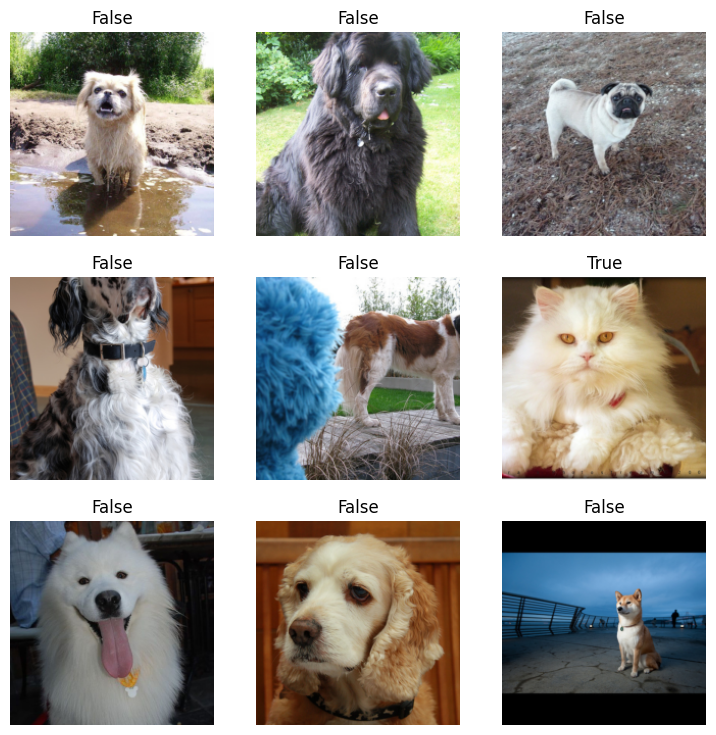

In [9]:
dls.show_batch()

In [10]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 146MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.158234,0.028297,0.008119,00:26


epoch,train_loss,valid_loss,error_rate,time
0,0.068489,0.052774,0.014885,00:31
1,0.043846,0.013286,0.004060,00:31
2,0.014372,0.008031,0.002030,00:32


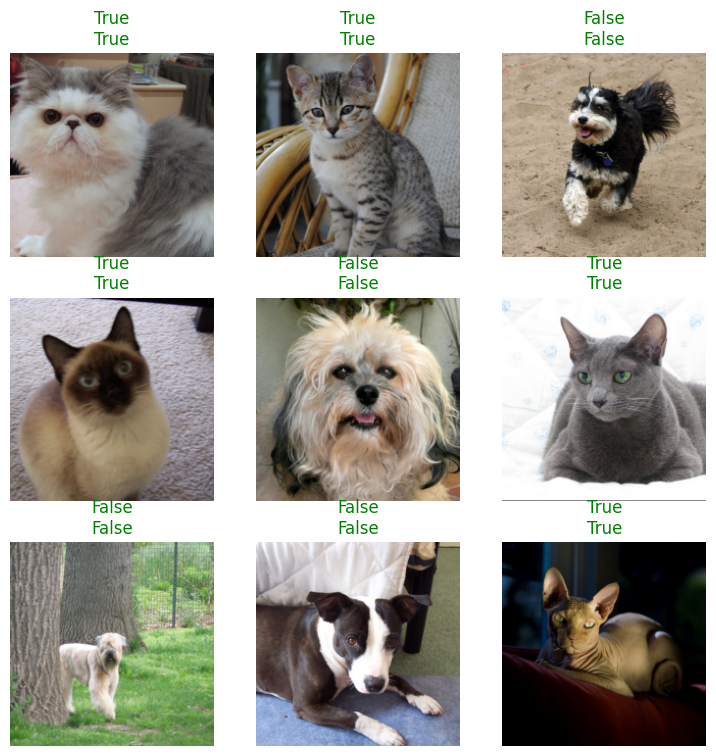

In [11]:
learn.show_results()

In [12]:
learn.export('model.pkl')

In [13]:
interp = Interpretation.from_learner(learn)

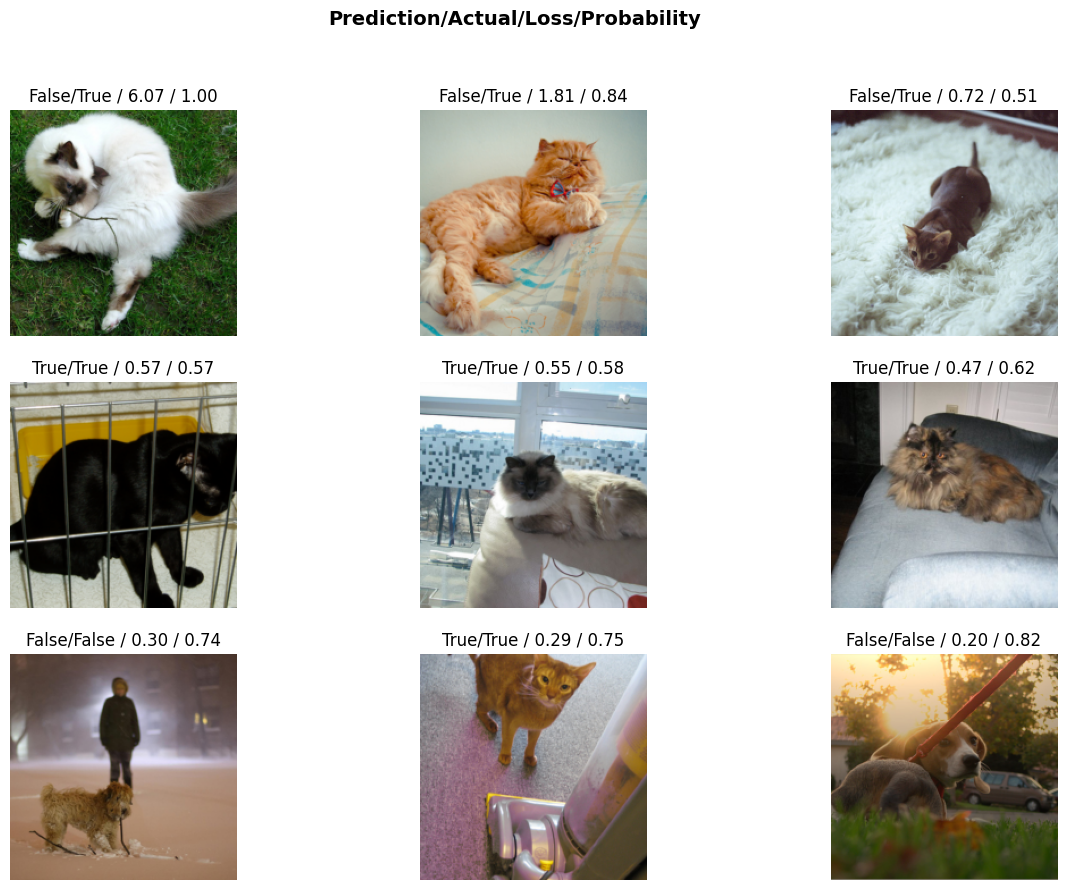

In [14]:
interp.plot_top_losses(9, figsize=(15,10))